# Practice applying ML algorithm
Practice applying the decision tree algorithm in a toy dataset, following the lecture of CSE445.

In [1]:
# only need this line in jupyter
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
music_df = pd.read_csv('../practice_datasets/music.csv')
music_df.shape

(18, 3)

In [50]:
music_df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [3]:
music_df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


## Describe dataframe by gender

In [23]:
female_music_df = music_df[ (music_df['gender'] == 0) ]
female_music_df['genre'].value_counts()

Classical    3
Acoustic     3
Dance        3
Name: genre, dtype: int64

In [26]:
male_music_df = music_df[ (music_df['gender'] == 1) ]
male_music_df['genre'].value_counts()

Classical    3
HipHop       3
Jazz         3
Name: genre, dtype: int64

In [45]:
male_music_df.genre.value_counts()['HipHop']

3

## Draw male-female bar graph of genre frequencies

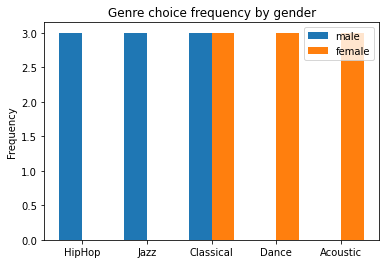

In [48]:
labels = music_df['genre'].unique()

male_genre_cnts = []
female_genre_cnts = []

for label in labels:
    try:
        male_genre_cnts.append(male_music_df.genre.value_counts()[label])
    except:
        male_genre_cnts.append(0)
    
    try:
        female_genre_cnts.append(female_music_df.genre.value_counts()[label])
    except:
        female_genre_cnts.append(0)
        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, male_genre_cnts, width, label='male')
ax.bar(x + width/2, female_genre_cnts, width, label='female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Genre choice frequency by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.show()

## Split columns to inputs & outputs

In [12]:
x = music_df.drop(columns='genre')
y = music_df['genre']

In [13]:
x.head()

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1


In [14]:
y.head()

0    HipHop
1    HipHop
2    HipHop
3      Jazz
4      Jazz
Name: genre, dtype: object

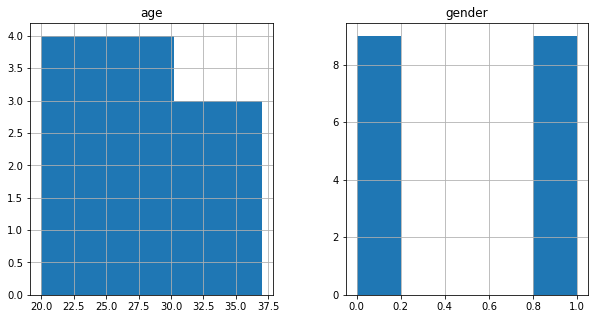

In [27]:
x.hist(bins=5, figsize=(10,5))
plt.show()